#### Analyse de série temporelle avec Python

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Dans cet tutoriel, nous nous intéressons au cours de l'action ford sur le marché US. Pour ce faire, nous utiliserons la fonction **DataReader** de pandas.

In [2]:
#### Création d'un data frame avec les valeur de l'action Ford de 2012 à 2019
ford = web.DataReader('F', data_source= "yahoo", start = "3/14/2012", end = "3/21/2020" )

On obtient un dataframe de 6 colonnes pour chaque date de cotation (Index).
* **Open** le prix d'ouverture
* **High** le prix le plus haut
* **Low** le prix le plus bas 
* **Close** le prix de clôture de l'action
* **Adj Close** le prix ajusté de clôture (cf ouverture de capital)
* **Volume** qui correspond au nombre d'actions échangé le jour

In [3]:
ford.head(5)
ford.tail(5) ### 5 dernière valeurs du cours

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,5.22,5.00,5.04,5.01,110310900.0,5.01
2020-03-17,5.14,4.70,5.08,5.01,104233500.0,5.01
2020-03-18,4.84,4.10,4.75,4.50,125954700.0,4.50
2020-03-19,4.58,4.10,4.33,4.47,126603800.0,4.47
2020-03-20,4.75,4.25,4.54,4.33,129314000.0,4.33


In [4]:
ford.shape #### 1777 valeurs pour l'interval choisie

(2018, 6)

In [5]:
##### Moyenne sur les 100 dernières valeurs pour avoir un ordre d'idée du prix de l'action

import numpy as np 

len(ford.iloc[1677:1777,:]) #### 100 dernières valeurs

np.mean(ford.iloc[1677:1777, :])

High         8.818100e+00
Low          8.576800e+00
Open         8.699300e+00
Close        8.689700e+00
Volume       4.435150e+07
Adj Close    7.947731e+00
dtype: float64

En moyenne sur les 100 dernières valeurs, l'action ford vaut **8.70** dollars.

On crée une nouvelle variable qui correspond aux rangs de l'action dans notre data frame de la plus ancienne à la plus récente. On l'appelera "**Num**".

In [6]:
ford["Num"] = range(1, len(ford) +1) ##### Incrémente la valeur suivant son rang dans le dataset

In [7]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2020-03-16,5.22,5.00,5.04,5.01,110310900.0,5.01,2014
2020-03-17,5.14,4.70,5.08,5.01,104233500.0,5.01,2015
2020-03-18,4.84,4.10,4.75,4.50,125954700.0,4.50,2016
2020-03-19,4.58,4.10,4.33,4.47,126603800.0,4.47,2017
2020-03-20,4.75,4.25,4.54,4.33,129314000.0,4.33,2018


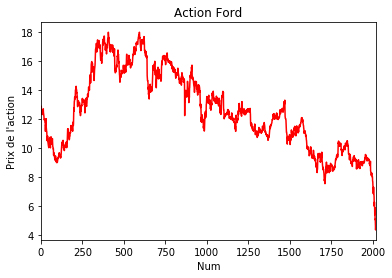

In [8]:
#### On trace le prix de l'action en fonction du temps

def graph(x,y,data):
    
    """
        Graphique une variable en fonction de l'autre
            Entrée: Nom colonne 1 (x), nom colonne 2 (y) et données (data)
            
            Sortie: Graphique
    """

    graph = data.plot("Num", "Open", legend = False, title = "Action Ford", color = (1,0,0));
    graph.legend = None
    graph.set_ylabel('Prix de l\'action')
    

graph("Num", "Open", ford)

Dans cette partie, on ne sélectionnera qu'un dixième et un vingtième des données:

**10 %** des données:

In [9]:
un_dixieme = ford.sample(frac = .1, random_state = np.random.randint(10))

In [10]:
#### De la même façon avec 5% des données

un_vingtieme = ford.sample(frac = .05, random_state = np.random.randint(10))

In [11]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2017-03-16,12.72,12.590000,12.65,12.700000,28954700.0,10.447505,1260
2013-02-07,13.31,13.000000,13.26,13.070000,33987500.0,9.263282,227
2015-10-30,14.95,14.630000,14.74,14.810000,29225800.0,11.490621,915
2015-07-14,14.86,14.590000,14.71,14.810000,20830700.0,11.259813,838
2014-08-27,17.40,17.209999,17.23,17.360001,18221100.0,12.828933,618


PB: Valeur ne sont pas dans l'ordre

In [12]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2017-03-16,12.72,12.590000,12.65,12.700000,28954700.0,10.447505,1260
2013-02-07,13.31,13.000000,13.26,13.070000,33987500.0,9.263282,227
2015-10-30,14.95,14.630000,14.74,14.810000,29225800.0,11.490621,915
2015-07-14,14.86,14.590000,14.71,14.810000,20830700.0,11.259813,838
2014-08-27,17.40,17.209999,17.23,17.360001,18221100.0,12.828933,618


In [13]:
#### On enleve l'index de ce data frame

un_dixieme.index.name = None
un_dixieme.head()####Plus le nom de l'index Date

un_vingtieme.index.name = None

In [14]:
#### On tri les valeurs par Num

un_dixieme = un_dixieme.sort_values(by = ["Num"], ascending = [True])
un_dixieme[["Open", "Close", "Num"]]#### Double crôchet
un_vingtieme = un_vingtieme.sort_values(by = ["Num"], ascending = [True])

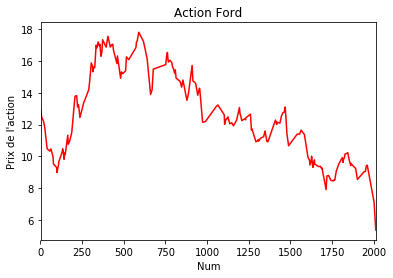

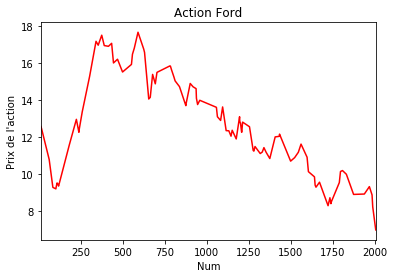

In [15]:
#### On trace le graphique original par rapport à l'echantillon de données

#### Un dixième
graph("Num", "Open", un_dixieme)

#### Un vingtième
graph("Num", "Open", un_vingtieme)


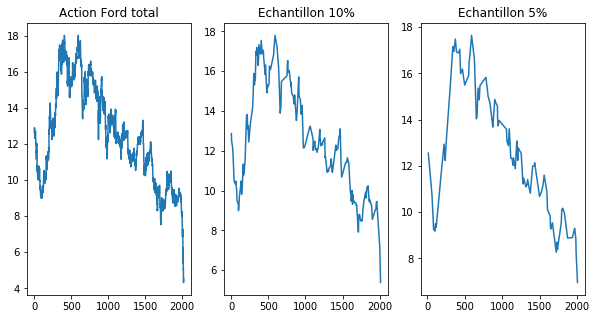

In [16]:
#### On affiche les deux graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes


def trois_graph(x, y):
    
    """
        Fonction qui retourne trois graphiques (Action ford, 10% des valeurs aléatoires et 5% des valeurs)
        
        Entrée: Nom de colonne x et y
        
        Sortie: Trois graphiques
    
    """
    #### Une ligne et trois tableaux 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    #### Affichage premier tableau 
    axes[0].plot(x, y, data = ford)
    axes[0].set_title("Action Ford total")
    
    #### Affichage second tableau 10%
    axes[1].plot(x, y, data = un_dixieme)
    axes[1].set_title("Echantillon 10%")
    
    #### Affichage troisième tableau 5%
    axes[2].plot(x, y, data = un_vingtieme)
    axes[2].set_title("Echantillon 5%")


trois_graph("Num", "Open" ) #### Appel de la fonction

In [17]:
#### Modification de l'index pour que ce soit la variable "Num"

ford = ford.reset_index()
ford.head(3)

# ford.index = ford["Num"]
# ford

,Date,High,Low,Open,Close,Volume,Adj Close,Num
0,2012-03-14,12.90,12.63,12.64,12.88,47578500.0,8.930695,1
1,2012-03-15,13.04,12.83,12.90,12.90,55286600.0,8.944561,2
2,2012-03-16,12.90,12.51,12.86,12.51,77119600.0,8.674147,3


On génère une moyenne mobile avec une fenètre de 80 cotations. On place les résultats dans la colonne "**Moyenne mobile**".

In [18]:
#### Moyenne mobile 

#### Moyenne mobile à fenètre de 80
ford["Moyenne_Mobile"] = ford["Open"].rolling(window =80).mean()

ford[["Open", "Moyenne_Mobile"]].tail(5) #### 5 dernières colonnes de notre dataset

#ford

,Open,Moyenne_Mobile
2013,5.04,8.491250
2014,5.08,8.442375
2015,4.75,8.390750
2016,4.33,8.335250
2017,4.54,8.282000


Text(0.5,1,'Moyenne Mobile à 80 cotations')

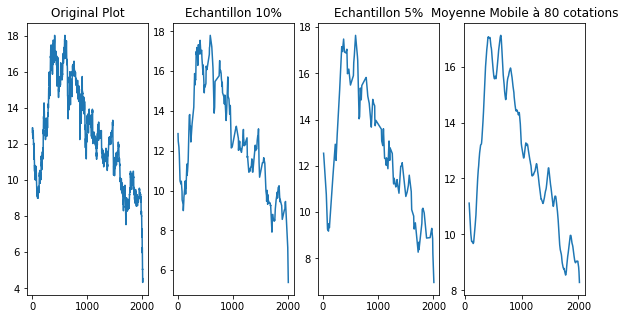

In [19]:
#### On affiche les 4 graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,5))

axes[0].plot("Num", "Open", data = ford)
axes[0].set_title("Original Plot")
axes[1].plot("Num", "Open", data = un_dixieme)
axes[1].set_title("Echantillon 10%")
axes[2].plot("Num", "Open", data = un_vingtieme)
axes[2].set_title("Echantillon 5%")
axes[3].plot("Num", "Moyenne_Mobile", data = ford)
axes[3].set_title("Moyenne Mobile à 80 cotations")

La moyenne mobile semble bien fitter les graphiques précedents. Qu'en est t-il si nous les superposons?

In [20]:
##### On affiche les données originale et les données lissée sur le même graphique


def sup_graph(x, y1, y2):
    """
        Entrée: Nombre de cotation(x), prix moyenne mobile (y1), prix high (y2)
        
        Sortie: Graphique
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111);
    #### Graphique 1: Moyenne mobile
    ax.plot(ford[x], ford[y1], color = (0,0,0), linewidth = 4, alpha =.9, label = "Lissé MM")
    
    #### Graphique 2: Plus haut de cotation
    ax.plot(ford[x], ford[y2], color = (1,0,0), label = "Original")

    ax.set_title('Les données originales et lissées')

    ax.set_xlabel('Num')
    ax.set_ylabel("Prix")
    ax.legend(loc = "lower right")

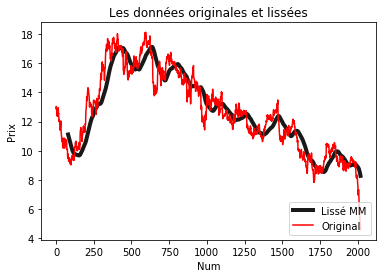

In [21]:
sup_graph("Num", "Moyenne_Mobile", "High")

Le même code mais avec les dates en abscisses:

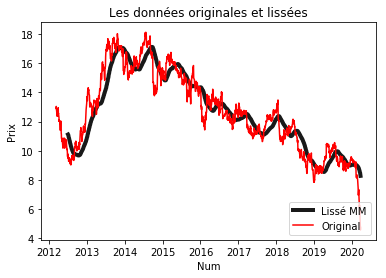

In [22]:
sup_graph("Date", "Moyenne_Mobile", "High")

On prendra ici les cotations entre 200 et 400.

In [25]:
#### Cotation entre 500 et 1000
Num_ford = ford[(ford["Num"] >= 500) & (ford["Num"]<=1000)]

In [ ]:
#Num_ford = ford[(ford["Num"] >= 200) & (ford["Num"]<=400)]

In [ ]:
Num_ford

In [26]:
#test and train split based on date
Num_ford['Date'] = pd.to_datetime(Num_ford['Date'])
train=Num_ford['Date'].dt.year<2019
test=Num_ford['Date'].dt.year>2019

fordTrain=Num_ford[train]
fordTest=Num_ford[train]

C:\Users\ABONIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Dans cette partie, on cherchera à prédire notre moyenne mobile à l'aide d'une régression linéaire

In [28]:
#### Regression Linéaire

from sklearn.linear_model import LinearRegression

#### fit(X,y)

#### On cherche a predire une moyenne mobile

model = LinearRegression().fit(fordTrain[["Close"]], fordTrain[["Moyenne_Mobile"]])


m = model.coef_[0
               ]
b = model.intercept_

#### Equation de la ligne

print("y=", round(m[0], 2), "x +", round(b[0],2)) ##### Equation de la droite

y= 0.44 x + 8.81


<math>
Y = X \beta + \epsilon
</math>

In [29]:
#### Prédiction de la moyenne mobile du cours d'ouverture

prediction = model.predict(fordTest[["Moyenne_Mobile"]])
prediction[:10]

array([[15.74328834],
       [15.73556038],
       [15.72652628],
       [15.71591395],
       [15.70562814],
       [15.69637636],
       [15.68886609],
       [15.68037622],
       [15.67281151],
       [15.6639951 ]])

In [30]:
##### On crée un nouveau data frame avec les valeurs prédites
prediction = pd.DataFrame(data = prediction, index = Num_ford.index.values, columns = ["Pred"])

prediction.head(5)  #### Affichage des 5 valeurs

,Pred
499,15.743288
500,15.735560
501,15.726526
502,15.715914
503,15.705628


In [31]:
#### Jointure de la prediction avec l'ancienne table
jointure = Num_ford.join(prediction, how = "inner") 
jointure.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
499,2014-03-11,15.52,15.17,15.49,15.30,34612800.0,11.139113,500,15.925000,15.743288
500,2014-03-12,15.42,15.15,15.24,15.40,31250500.0,11.211920,501,15.907250,15.735560
501,2014-03-13,15.46,15.10,15.46,15.18,34344100.0,11.051748,502,15.886500,15.726526
502,2014-03-14,15.25,15.06,15.18,15.08,26943300.0,10.978944,503,15.862125,15.715914
503,2014-03-17,15.33,15.16,15.18,15.28,26929100.0,11.124554,504,15.838500,15.705628


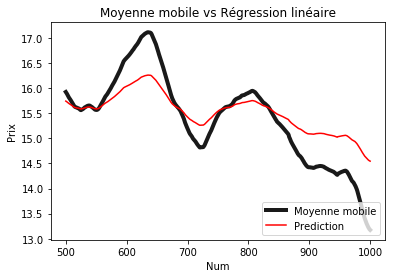

In [32]:
#### Affichage de la moyenne mobile et de la prédiction

fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [33]:
import sklearn

r_carre = sklearn.metrics.r2_score(jointure["Moyenne_Mobile"],jointure["Pred"], multioutput = "uniform_average")
r_carre

0.666224520203802

In [34]:
### Check the performance of the Prediction
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Num_ford[["Close"]],  model.predict(Num_ford[["Moyenne_Mobile"]]), cv=5)
print("scores = " + str(scores))

scores = [ 0.13829673 -2.95650598 -0.9398207   0.42220266 -6.99723207]


In [35]:
from sklearn.model_selection import train_test_split
X = Num_ford[['Close','Open']]
y = Num_ford[['Moyenne_Mobile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

In [37]:
metrics=y_test-linreg.predict(X_test)
metrics

,Moyenne_Mobile
881,-0.181589
725,-0.431276
541,-0.036314
860,-0.100104
832,0.360823
573,-0.180850
863,-0.160193
909,-1.233401
510,0.184736
833,0.387234


In [38]:
prediction = pd.DataFrame(data = y_hat_test, index = X_test.index.values, columns = ["Pred"])

prediction.head(5) 
jointure = Num_ford.join(prediction, how = "inner") 
jointure.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
987,2016-02-17,12.30,11.98,11.99,12.27,37766400.0,9.637832,988,13.534500,14.095111
993,2016-02-25,12.40,12.05,12.11,12.39,32024800.0,9.732090,994,13.306750,14.145635
994,2016-02-26,12.59,12.40,12.52,12.47,30228800.0,9.794927,995,13.279000,14.315715
997,2016-03-02,13.35,13.04,13.06,13.22,36598200.0,10.384038,998,13.205125,14.544695
998,2016-03-03,13.61,13.24,13.25,13.54,44524500.0,10.635389,999,13.187000,14.625695


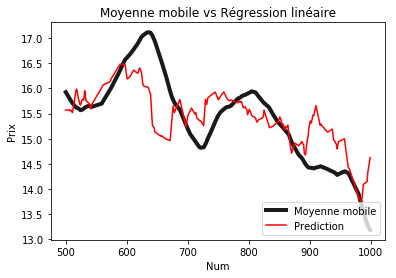

In [39]:
fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [40]:
import sklearn

r_carre = sklearn.metrics.r2_score(y_test,y_hat_test, multioutput = "uniform_average")
r_carre

0.5135172088742537

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
print("Squared Mean Error:",test_rmse)
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:",test_mae)


Squared Mean Error: 0.6103153863592214
Mean Absolute Error: 0.4672280532073525


In [42]:
cv_5_results = cross_val_score(linreg, X, y, cv=5)
print("5 fold cross validation score:",cv_5_results)

5 fold cross validation score: [ 0.20772396 -2.85173717 -0.85084805  0.44338012 -6.65620061]
